In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mfp_neutral_region_size = np.load('/lustre/aoc/projects/hera/wchin/mfp_neutral_region_size_z_x_HI.npy')
mfp_size_probabilities = np.load('/lustre/aoc/projects/hera/wchin/mfp_size_probabilities_z_x_HI.npy')

In [3]:
bin_num_mfp = int(1e3)
iteration_mfp = int(1e8)

## Vary: Rmax, EFF, constant: x_HI, z. x_HI error: 1e-2%

In [4]:
redshifts = np.arange(8.5, 4, -0.5)

total_neutral_fractions = np.array([7.32499807e-01, 6.28706887e-01, 4.94936030e-01, 3.38962514e-01,
       1.89180400e-01, 7.99697213e-02, 2.22389814e-02, 3.54182052e-03,
       2.10697631e-04])

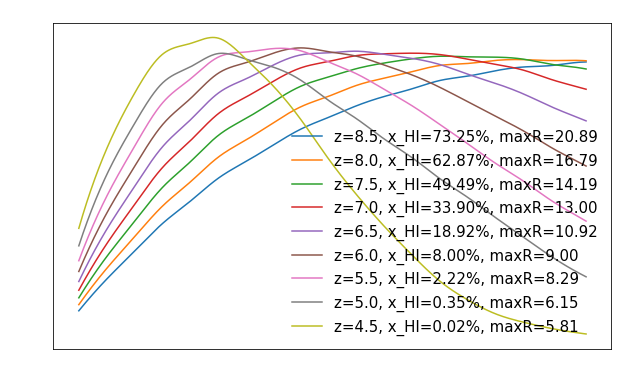

In [5]:
color='white'
percent=0.475

mfp_maxRs = np.zeros(len(mfp_size_probabilities))

plt.rcParams['figure.figsize'] = [10, 6]
for i, mfp_size_probability in enumerate(mfp_size_probabilities):
    
    mfp_maxRs[i] = mfp_neutral_region_size[np.argmax(mfp_size_probability)]
    
    plt.plot(
        mfp_neutral_region_size[:int(percent*bin_num_mfp)], 
        mfp_size_probability[:int(percent*bin_num_mfp)], 
        '-',
        label=f'z={redshifts[i]:.1f}, x_HI={total_neutral_fractions[i]*100:.2f}%, \
maxR={mfp_maxRs[i]:.2f}'
    )
plt.legend(prop={'size': 15}, fancybox=True, framealpha=0)
plt.tick_params(color=color, labelcolor=color)
plt.xlabel('$R$ (Mpc)', color=color)
plt.ylabel('$R\mathrm{d}P/\mathrm{d}R$', color=color)
plt.title(f'Our Boxes, MFP method: Vary: Rmax, EFF, constant: x_HI, z={redshifts[0]} ({iteration_mfp:.0e} iterations)', color=color)
plt.rcParams['font.size'] = 18
# plt.yscale('log')

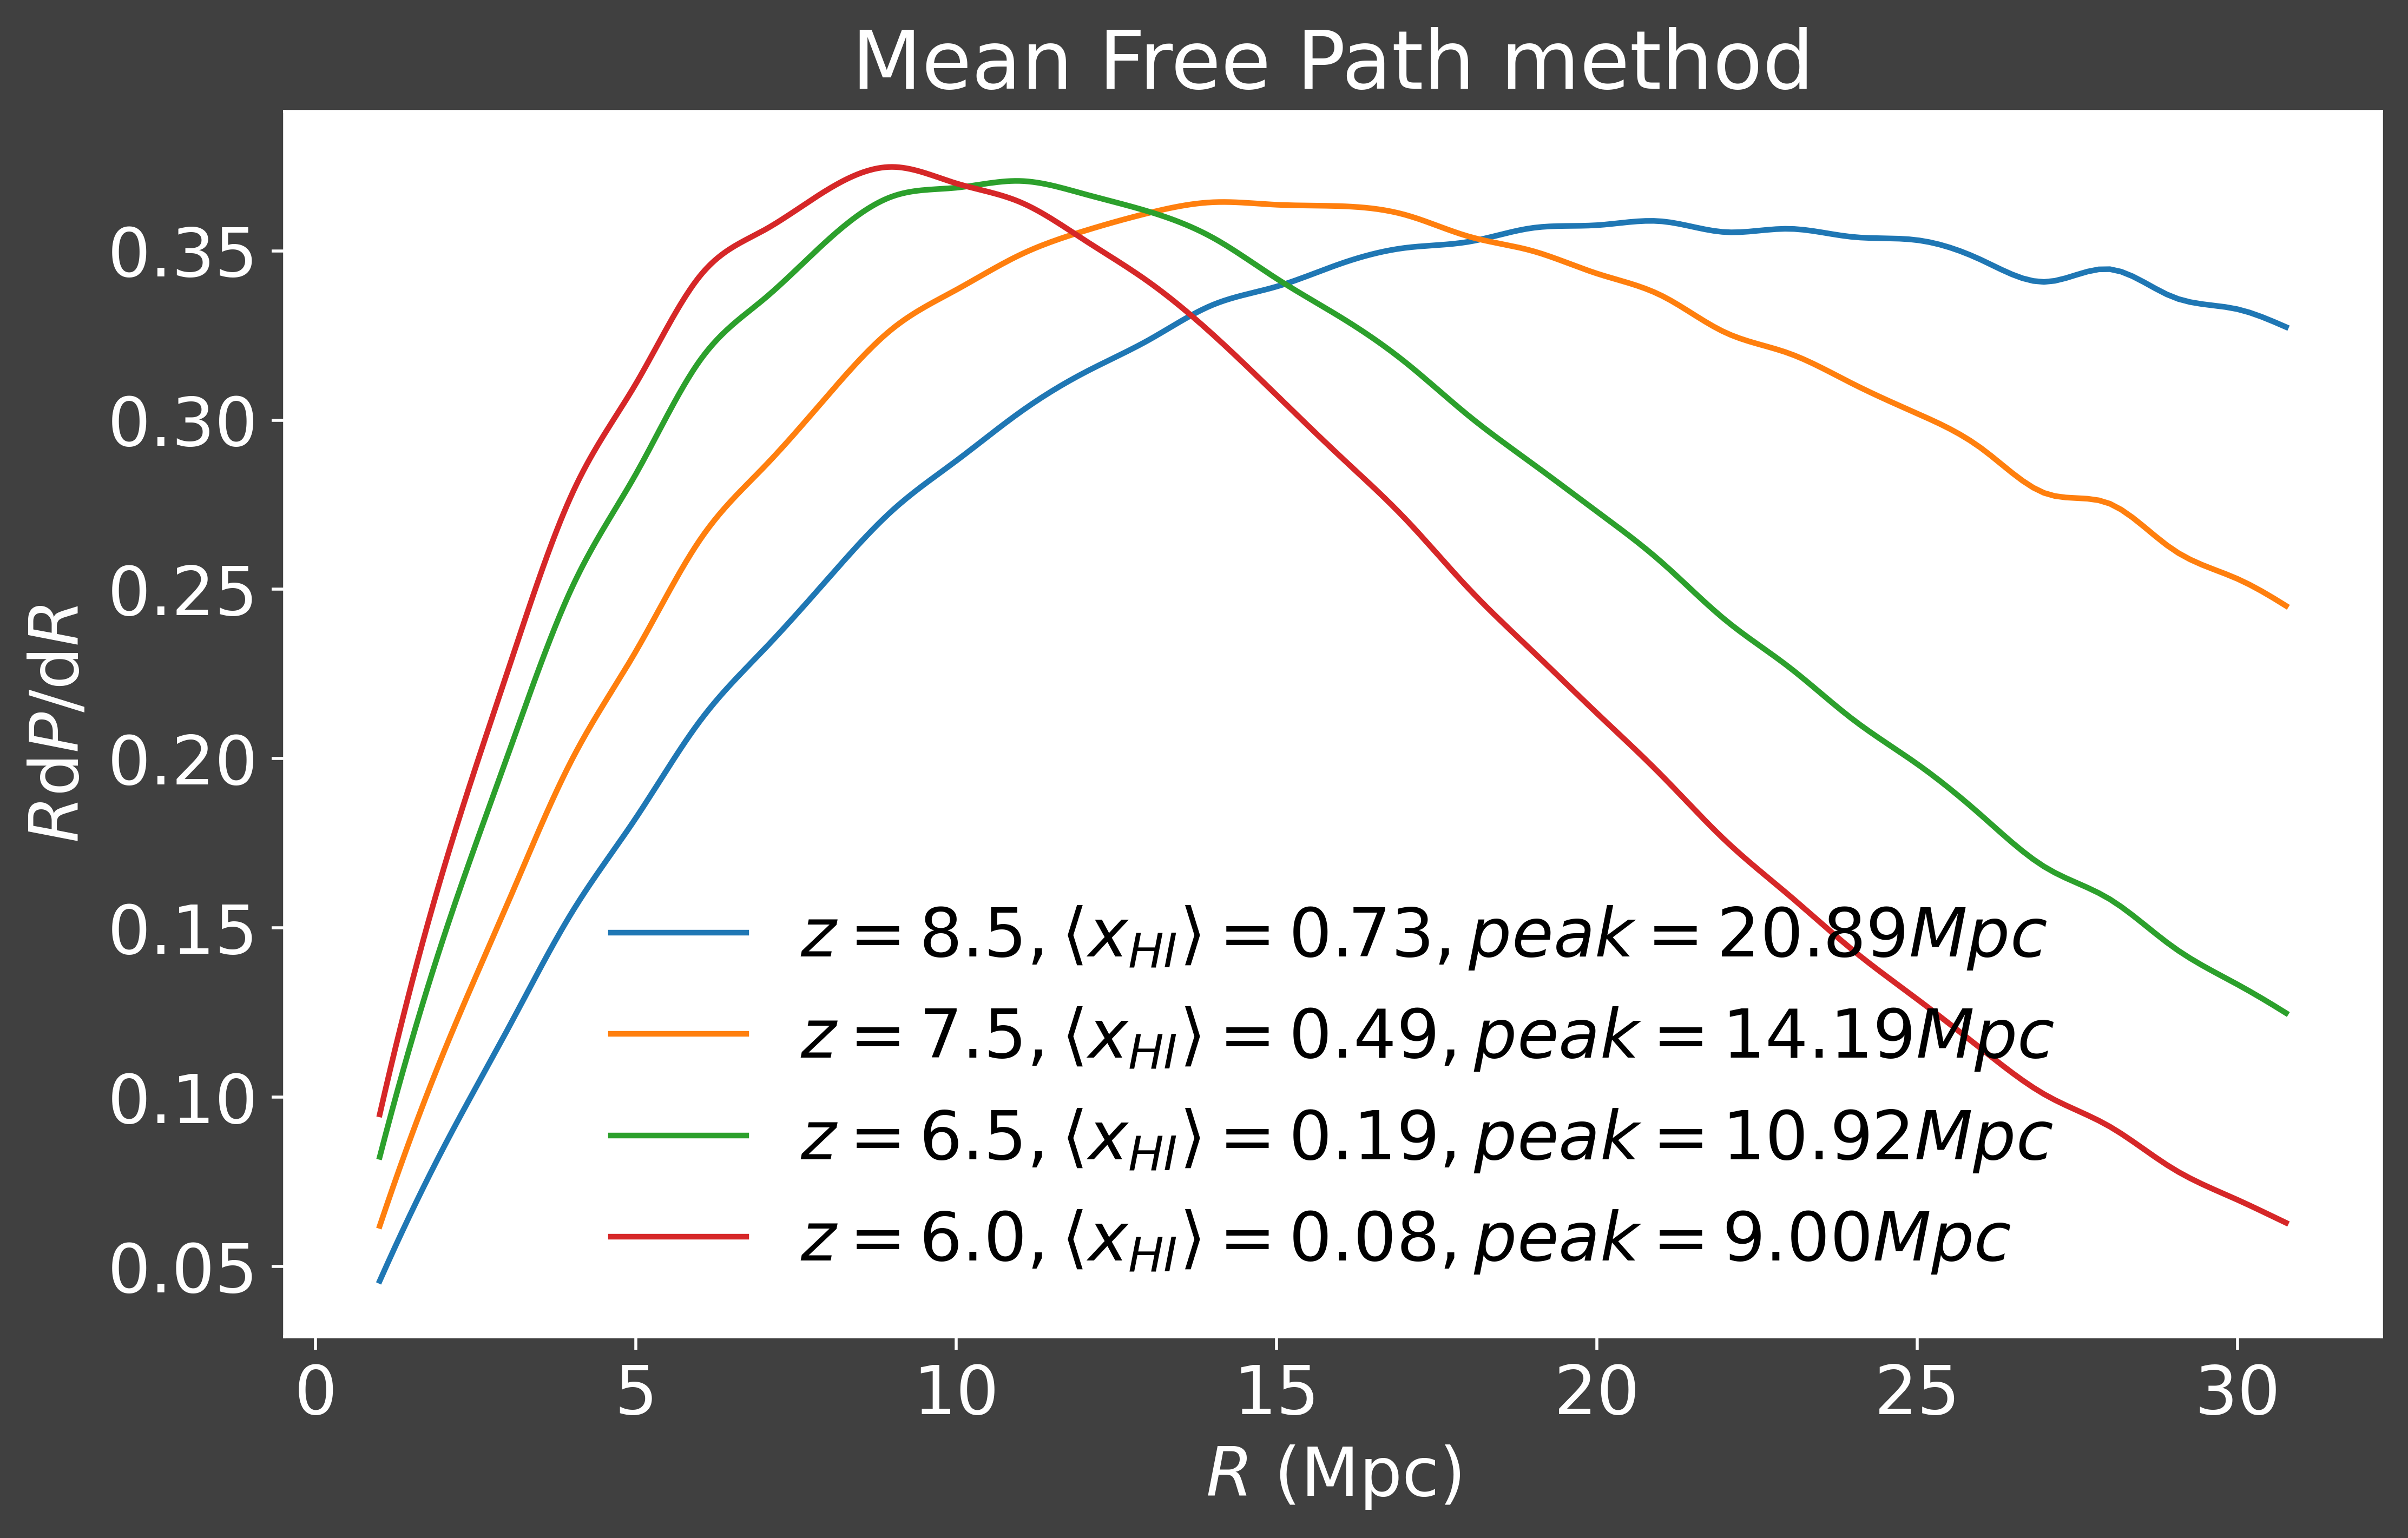

In [6]:
color='w'

percent=0.55

mfp_maxRs = np.zeros(len(mfp_size_probabilities))

fig = plt.figure(dpi=500, facecolor='#404040')
ax = fig.gca()
for spine in ax.spines.values():  # figure color
    spine.set_edgecolor(color)
    
for i in np.array([0, 2, 4, 5]):
    
    mfp_maxRs[i] = mfp_neutral_region_size[np.argmax(mfp_size_probabilities[i])]
    
#     if i == 5:
#         plt.plot(
#             mfp_neutral_region_size[:int(percent*bin_num_mfp)], 
#             mfp_size_probabilities[i][:int(percent*bin_num_mfp)], 
#             '-',
#             linewidth=5,
#             label=f'$z={redshifts[i]:.1f}, x_{{HI}}={total_neutral_fractions[i]*100:.2f}\%, \
#     peak={mfp_maxRs[i]:.2f}$'
#         )
#     else:
    plt.plot(
        mfp_neutral_region_size[:int(percent*bin_num_mfp)], 
        mfp_size_probabilities[i][:int(percent*bin_num_mfp)], 
        '-',
        label=f'$z={redshifts[i]:.1f},$' r'$ \langle x_{{HI}} \rangle$' f'$={total_neutral_fractions[i]:.2f}, \
peak={mfp_maxRs[i]:.2f}Mpc$'
    )
plt.legend(fancybox=True, framealpha=0)
plt.tick_params(color=color, labelcolor=color)
plt.xlabel('$R$ (Mpc)', color=color)
plt.ylabel('$R\mathrm{d}P/\mathrm{d}R$', color=color)
plt.title(f'Mean Free Path method', color=color)
# plt.rcParams['font.size'] = font
# plt.yscale('log')
plt.show()